# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query = base_url + "appid=" + weather_api_key + "&units=imperial" + "&q=" #+ city


#row counter

set_counter = 1
record_counter = 0
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
windspeed = []
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        response = requests.get(query+city).json()
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"])
        
        if record_counter >= 49:
            record_counter = 1
            set_counter =  set_counter + 1
            city_list.append(city)
        else: 
            record_counter = record_counter + 1
            city_list.append(city)
        print(f"Processing Record {record_counter} of Set {set_counter}| {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| rikitea
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 1| yellowknife
Processing Record 3 of Set 1| mayo
Processing Record 4 of Set 1| hithadhoo
Processing Record 5 of Set 1| troitskoye
Processing Record 6 of Set 1| atuona
Processing Record 7 of Set 1| punta arenas
Processing Record 8 of Set 1| ponta do sol
City not found. Skipping...
Processing Record 9 of Set 1| arraial do cabo
Processing Record 10 of Set 1| port elizabeth
Processing Record 11 of Set 1| hilo
Processing Record 12 of Set 1| jamestown
Processing Record 13 of Set 1| avarua
Processing Record 14 of Set 1| airai
Processing Record 15 of Set 1| la ronge
Processing Record 16 of Set 1| show low
City not found. Skipping...
Processing Record 17 of Set 1| griffith
Processing Record 18 of Set 1| torbay
City not found. Skipping...
Processing Record 19 of Set 1| lucerna
Processing Record 20 of Set 1| bethel
Process

Processing Record 42 of Set 4| pitimbu
Processing Record 43 of Set 4| nhulunbuy
Processing Record 44 of Set 4| atasu
Processing Record 45 of Set 4| bam
Processing Record 46 of Set 4| urucui
Processing Record 47 of Set 4| coos bay
Processing Record 48 of Set 4| kendrapara
City not found. Skipping...
Processing Record 49 of Set 4| dali
Processing Record 1 of Set 5| parad
Processing Record 2 of Set 5| lata
Processing Record 3 of Set 5| waddan
Processing Record 4 of Set 5| kudahuvadhoo
Processing Record 5 of Set 5| fort-shevchenko
Processing Record 6 of Set 5| sehithwa
Processing Record 7 of Set 5| deer lake
Processing Record 8 of Set 5| oistins
Processing Record 9 of Set 5| kahului
City not found. Skipping...
Processing Record 10 of Set 5| bay-khaak
Processing Record 11 of Set 5| luanda
Processing Record 12 of Set 5| verkh-usugli
Processing Record 13 of Set 5| libas
Processing Record 14 of Set 5| faanui
Processing Record 15 of Set 5| bredasdorp
Processing Record 16 of Set 5| mackay
Proces

Processing Record 42 of Set 8| taoudenni
City not found. Skipping...
Processing Record 43 of Set 8| rovaniemi
Processing Record 44 of Set 8| yaan
City not found. Skipping...
Processing Record 45 of Set 8| jequie
Processing Record 46 of Set 8| khovu-aksy
Processing Record 47 of Set 8| ouadda
Processing Record 48 of Set 8| varadero
Processing Record 49 of Set 8| nemuro
Processing Record 1 of Set 9| rio grande
Processing Record 2 of Set 9| washington
Processing Record 3 of Set 9| vardo
Processing Record 4 of Set 9| kuytun
Processing Record 5 of Set 9| shahapur
Processing Record 6 of Set 9| iskateley
Processing Record 7 of Set 9| lufkin
Processing Record 8 of Set 9| luganville
Processing Record 9 of Set 9| ciudad bolivar
Processing Record 10 of Set 9| itacoatiara
Processing Record 11 of Set 9| parabel
Processing Record 12 of Set 9| qasigiannguit
Processing Record 13 of Set 9| keningau
Processing Record 14 of Set 9| jutai
Processing Record 15 of Set 9| sept-iles
Processing Record 16 of Set 

Processing Record 35 of Set 12| svetlyy
Processing Record 36 of Set 12| dudinka
Processing Record 37 of Set 12| sola
City not found. Skipping...
Processing Record 38 of Set 12| harper
Processing Record 39 of Set 12| del rio
Processing Record 40 of Set 12| rincon
Processing Record 41 of Set 12| nuuk
Processing Record 42 of Set 12| bismarck
-----------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
weather_dict = {"City": city_list,
               "Cloudiness": cloudiness,
                "Country":country,
                "Date": date,
                "Humidity" : humidity,
                "Latitude": lat,
                "Longitude" : long,
                "Wind Speed": windspeed,
                "Max Temp": max_temp
               }

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Wind Speed,Max Temp
0,rikitea,97,PF,1619394100,73,-23.1203,-134.9692,6.31,78.30
1,yellowknife,90,CA,1619393863,72,62.4560,-114.3525,13.80,10.00
2,mayo,40,US,1619394177,42,38.8876,-76.5119,10.36,64.40
3,hithadhoo,80,MV,1619393821,69,-0.6000,73.0833,4.34,82.09
4,troitskoye,100,RU,1619394431,76,52.9821,84.6757,5.73,35.37


In [37]:
weather_df.to_csv("city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

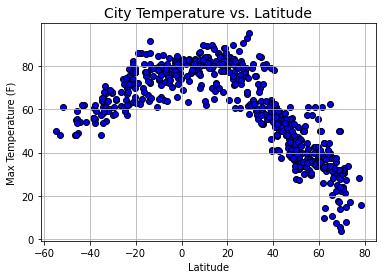

In [60]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], 
            facecolor = 'blue', edgecolor = "black")

plt.title("City Temperature vs. Latitude", fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("../images/City Temperature vs. Latitude.png")

## Latitude vs. Humidity Plot

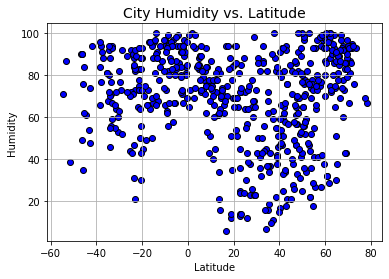

In [59]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], 
            facecolor = 'blue', edgecolor = "black")

plt.title("City Humidity vs. Latitude", fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.grid()

plt.savefig("../images/City Humidity vs. Latitude.png")

## Latitude vs. Cloudiness Plot

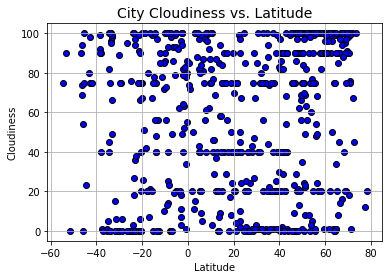

In [58]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], 
            facecolor = 'blue', edgecolor = "black")

plt.title("City Cloudiness vs. Latitude", fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("../images/City Cloudiness vs. Latitude.png")

## Latitude vs. Wind Speed Plot

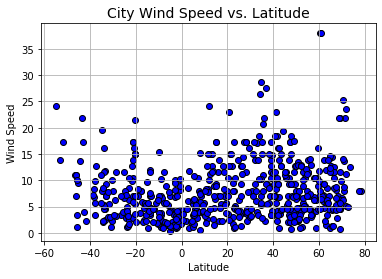

In [57]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], 
            facecolor = 'blue', edgecolor = "black")

plt.title("City Wind Speed vs. Latitude", fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig("../images/City Wind Speed vs. Latitude.png")

## Linear Regression

In [56]:
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]





####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared is: -0.8920784838242178


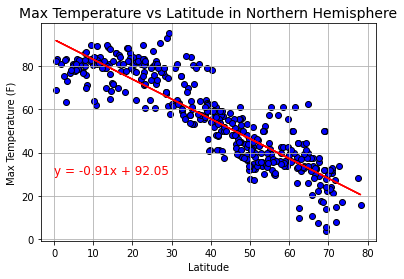

In [66]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))


north_temp_regression = plt.scatter(x_values, y_values, facecolor = 'blue', edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30), fontsize = 12, color = 'red')
plt.grid()
plt.title('Max Temperature vs Latitude in Northern Hemisphere', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f'The r squared is: {rvalue}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared is: 0.773831222412521


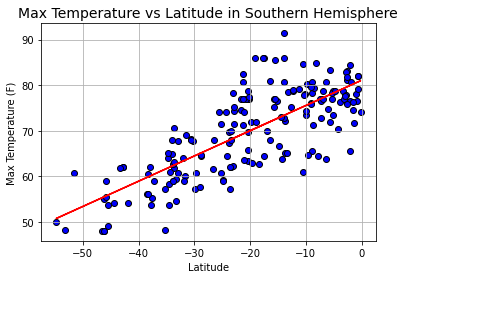

In [67]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))


south_temp_regression = plt.scatter(x_values, y_values, facecolor = 'blue', edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30), fontsize = 12, color = 'red')
plt.grid()
plt.title('Max Temperature vs Latitude in Southern Hemisphere', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f'The r squared is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared is: 0.12602771422714887


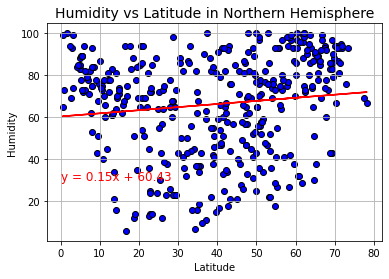

In [70]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))


north_Humid_regression = plt.scatter(x_values, y_values, facecolor = 'blue', edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30), fontsize = 12, color = 'red')
plt.grid()
plt.title('Humidity vs Latitude in Northern Hemisphere', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r squared is: {rvalue}')



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared is: 0.2832453595243991


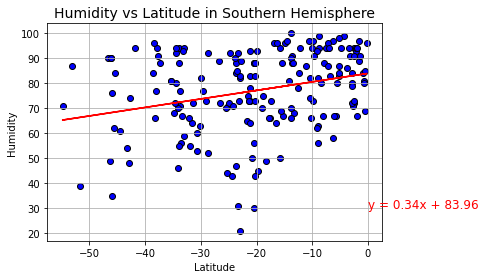

In [71]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))


south_Humid_regression = plt.scatter(x_values, y_values, facecolor = 'blue', edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30), fontsize = 12, color = 'red')
plt.grid()
plt.title('Humidity vs Latitude in Southern Hemisphere', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r squared is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared is: 0.1780373692472656


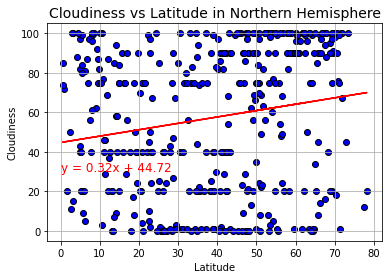

In [72]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))


north_cloud_regression = plt.scatter(x_values, y_values, facecolor = 'blue', edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30), fontsize = 12, color = 'red')
plt.grid()
plt.title('Cloudiness vs Latitude in Northern Hemisphere', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r squared is: {rvalue}')



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared is: 0.03788961039942149


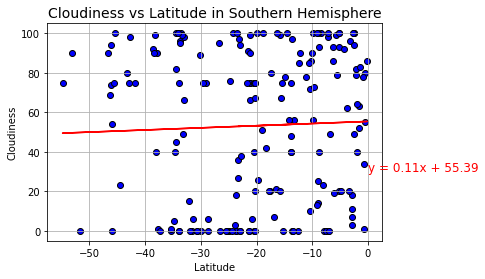

In [73]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))


south_cloud_regression = plt.scatter(x_values, y_values, facecolor = 'blue', edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30), fontsize = 12, color = 'red')
plt.grid()
plt.title('Cloudiness vs Latitude in Southern Hemisphere', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r squared is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared is: 0.11506761722811533


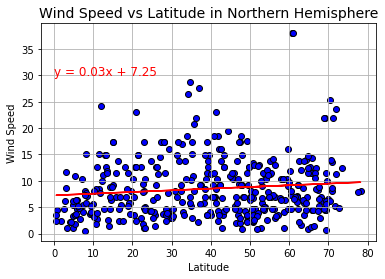

In [74]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))


north_wind_regression = plt.scatter(x_values, y_values, facecolor = 'blue', edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30), fontsize = 12, color = 'red')
plt.grid()
plt.title('Wind Speed vs Latitude in Northern Hemisphere', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r squared is: {rvalue}')




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared is: -0.3829610349247312


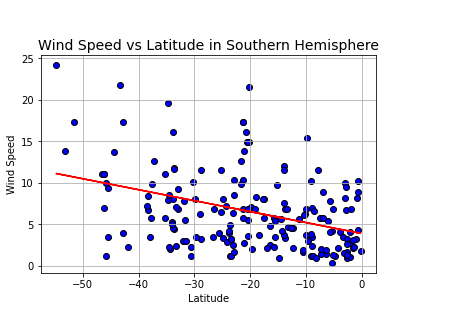

In [75]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))


south_wind_regression = plt.scatter(x_values, y_values, facecolor = 'blue', edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30), fontsize = 12, color = 'red')
plt.grid()
plt.title('Wind Speed vs Latitude in Southern Hemisphere', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r squared is: {rvalue}')